# Filtrage - Benjamin Cohen

# Calculer la fonction h
Après simplification on trouve que h(u) = f(u)/(1-F(u)) = mu. Et donc pour tout u, on a h = mu = 0.2

# Imports

In [67]:
import numpy as np
from matplotlib import pyplot as plt
import numpy.random as rd

# Constants

In [266]:
# Prepare data
T= 10 
mu = 0.2
a = 5
b = 10

# Simuler une trajectoire de N sur l'intervalle de temps [0, 10]


In [264]:
def Sim_N(T, a, b, mu):
    S = 0
    to = rd.exponential(1/mu)
    N_vals = []
    while S <= T:
        while S < min(to, T) : 
            incr_t = rd.exponential(1/a)
            if S + incr_t <= min(to, T):
                S += incr_t
                N_vals.append(S)
            else:
                break
        incr_t = rd.exponential(1/b)
        
        if S+incr_t <= T:
            S += incr_t
            N_vals.append(S)
        else:
            break        
    return [to, N_vals]

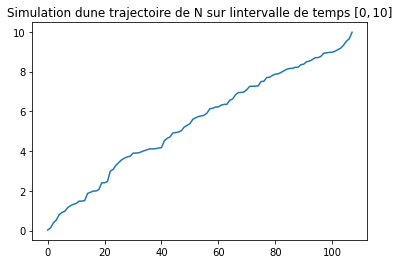

to =  1.5207748098177862


In [292]:
# Plot the graph
sim = Sim_N(T, a, b, mu)
plt.plot(sim[1])
plt.title('Simulation dune trajectoire de N sur lintervalle de temps [0, 10]')
plt.show()
print('to = ',sim[0])

# Représenter Ẑ(s) pour cette trajectoire et donner l'estimation de τ

In [271]:
def Z_hat(a, b, T, N_vals):
    X,Z = [],[]
    z = np.zeros(20)
    for k in range(len(N_vals[1])-1):
        if k > 0:
            x = np.linspace(N_vals[1][k-1], N_vals[1][k], 20)
            t_f = N_vals[1][k]
            t_i = N_vals[1][k-1]
            z[0] = Z[-1]
            
            for j in range(19):
                z[j+1] = z[j] + (t_f - t_i)/20*(mu - (b-a)*z[j])*(1-z[j])
            z[j+1] += (b-a)*z[j+1]*(1-z[j+1])/(a + (b-a)*z[j+1])
            
            X.pop(-1)
            X.extend(list(x))
            Z.pop(-1)
            Z.extend(list(z))
        else:
            x = np.linspace(0, N_vals[1][k], 20)
            Z_i = 0
            t_f = N_vals[1][0]
            t_i = 0
            
            for j in range(19):
                z[j+1] = z[j] + (t_f - t_i)/20*((mu - (b-a)*z[j])*(1-z[j]))
            z[j+1] += (b-a)*z[j+1]*(1-z[j+1])/(a + (b-a)*z[j+1])
            
            X.extend(list(x))
            Z.extend(list(z))
    z = np.zeros(20)
    x = np.linspace(N_vals[1][len(N_vals[1])-2], N_vals[1][len(N_vals[1])- 1], 20)
    
    t_f = N_vals[1][len(N_vals[1])- 1]
    t_i = N_vals[1][len(N_vals[1])- 2]
    z[0] = Z[-1]
    
    for j in range(19):
        z[j+1] = z[j] + (t_f - t_i)/20*((mu - (b-a)*z[j])*(1-z[j]))
    z[j+1] += (b-a)*z[j+1]*(1-z[j+1])/(a + (b-a)*z[j+1])
    
    X.pop(-1)
    X.extend(list(x))
    Z.pop(-1)
    Z.extend(list(z))
    
    z = np.zeros(20)
    x = np.linspace(N_vals[1][-1], T, 20)
    t_f = T
    t_i = N_vals[1][-1]
    z[0] = Z[-1]
    
    for j in range(19):
        z[j+1] = z[j] + (t_f - t_i)/20*((mu - (b-a)*z[j])*(1-z[j]))
    z[j+1] += (b-a)*z[j+1]*(1-z[j+1])/(a + (b-a)*z[j+1])
    
    X.pop(-1)
    X.extend(list(x))
    Z.pop(-1)
    Z.extend(list(z))
    return [Z, X]
        

Estimation de tau = 1.3864764202284476


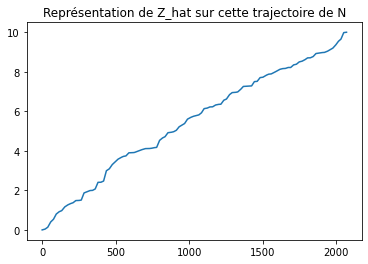

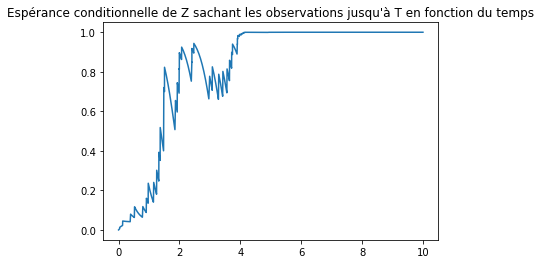

In [293]:
Z_est = Z_hat(a, b, 10, sim)
plt.plot(Z_est[1])
plt.title("Représentation de Z_hat sur cette trajectoire de N")
print("Estimation de tau =", Z_est[1][np.argmin(np.abs(Z_est[0] - 0.5*np.ones(len(Z_est[0]))))])
plt.show()
plt.close()
plt.plot(Z_est[1], Z_est[0])
plt.title("Espérance conditionnelle de Z sachant les observations jusqu'à T en fonction du temps")
plt.show()
plt.close()

# En utilisant la fonction kmeans de scikit-learn https://cedric.cnam.fr/vertigo/Cours/ml/tpKmeans.html, trouver un moyen d'estimer τ


In [291]:
#Ne fonctionne pas correctement
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2 , random_state = 0)
kmeans.fit([[t,0] for t in sim[1]])
kmeans.cluster_centers_

ind_max,ind_min = 0,0
for i in kmeans.labels_:
    if i == 0 : 
        ind_max += 1
ind_min = ind_max + 1

#Méthode 1 afin de prédire tau

tau_hat_1 = (sim[1][ind_min] + sim[1][ind_max])/2

#Méthode 2 afin de prédire tau

tau_hat_2 = sim[1][ind_min]

print('Prediction de avec la premiere methode kmeans pour notre trajectoire N:',tau_hat_1)
print('Prediction de tau avec la seconde methode kmeans pour notre trajectoire N:',tau_hat_2)

Prediction de avec la premiere methode kmeans pour notre trajectoire N: 8.275794861473159
Prediction de tau avec la seconde methode kmeans pour notre trajectoire N: 8.285721501624469


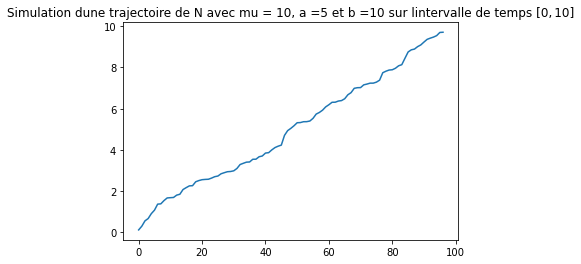

to =  0.15571473141607417
Estimation de tau = 1.7870732693455562


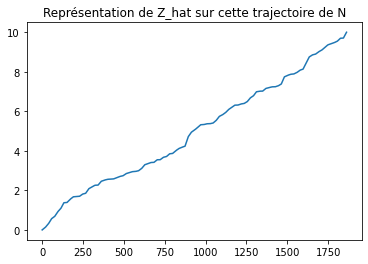

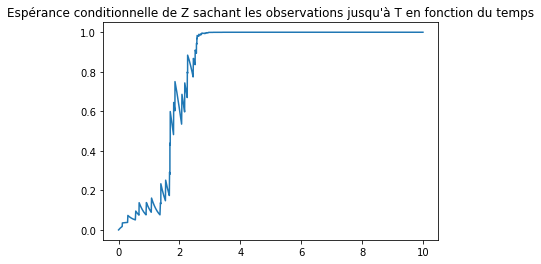

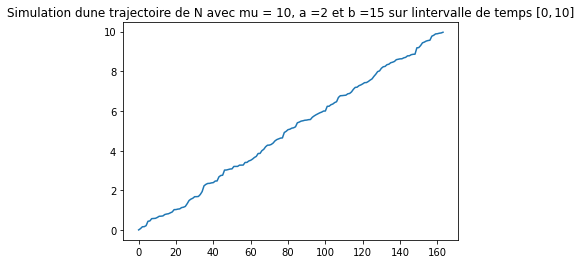

to =  0.21413873321069046
Estimation de tau = 0.5839913354615328


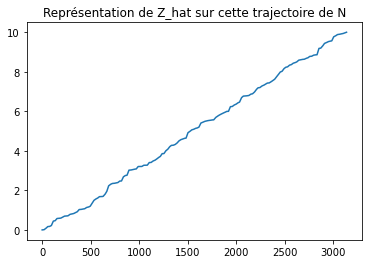

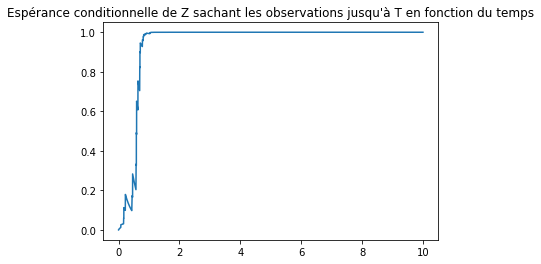

In [298]:
#avec mu = 10 on a : 
sim_2 = Sim_N(T, a, b, 10)
plt.plot(sim_2[1])
plt.title('Simulation dune trajectoire de N avec mu = 10, a =5 et b =10 sur lintervalle de temps [0, 10]')
plt.show()
plt.close()
print('to = ',sim_2[0])
Z_est_2 = Z_hat(a, b, 10, sim_2)
plt.plot(Z_est_2[1])
plt.title("Représentation de Z_hat sur cette trajectoire de N")
print("Estimation de tau =", Z_est_2[1][np.argmin(np.abs(Z_est_2[0] - 0.5*np.ones(len(Z_est_2[0]))))])
plt.show()
plt.close()
plt.plot(Z_est_2[1], Z_est_2[0])
plt.title("Espérance conditionnelle de Z sachant les observations jusqu'à T en fonction du temps")
plt.show()
plt.close()

sim_2_m = Sim_N(T, 2, 15, 10)
plt.plot(sim_2_m[1])
plt.title('Simulation dune trajectoire de N avec mu = 10, a =2 et b =15 sur lintervalle de temps [0, 10]')
plt.show()
plt.close()
print('to = ',sim_2_m[0])
Z_est_2_m = Z_hat(a, b, 10, sim_2_m)
plt.plot(Z_est_2_m[1])
plt.title("Représentation de Z_hat sur cette trajectoire de N")
print("Estimation de tau =", Z_est_2_m[1][np.argmin(np.abs(Z_est_2_m[0] - 0.5*np.ones(len(Z_est_2_m[0]))))])
plt.show()
plt.close()
plt.plot(Z_est_2_m[1], Z_est_2_m[0])
plt.title("Espérance conditionnelle de Z sachant les observations jusqu'à T en fonction du temps")
plt.show()
plt.close()


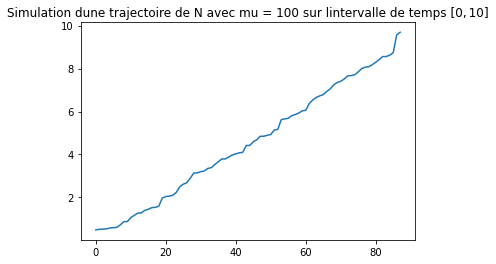

to =  0.008566012067914009
Estimation de tau = 0.5771480194523323


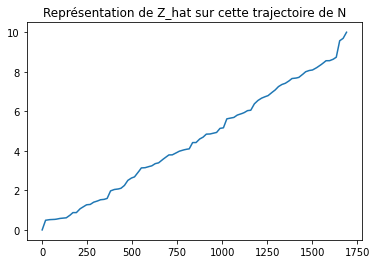

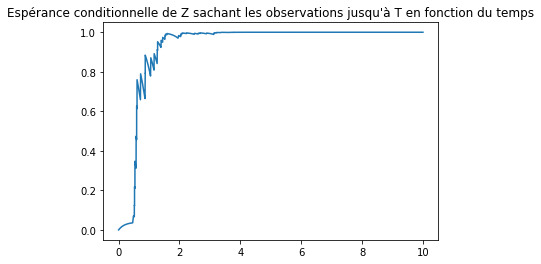

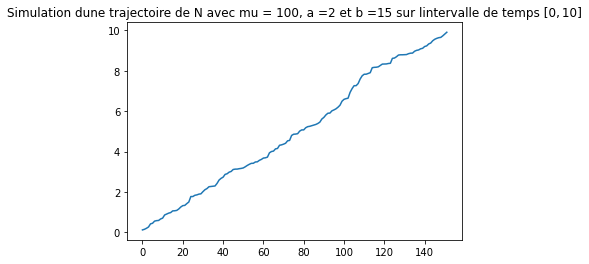

to =  0.0012252624401100918
Estimation de tau = 0.5836496939607679


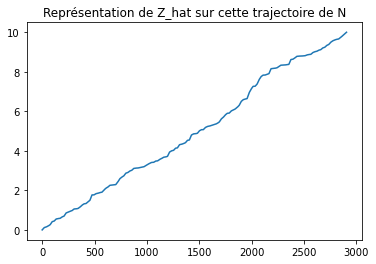

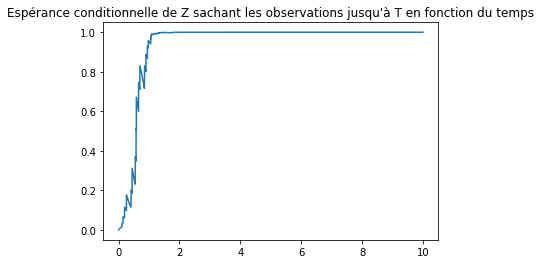

In [299]:
#avec mu = 100 on a : 
sim_3 = Sim_N(T, a, b, 100)
plt.plot(sim_3[1])
plt.title('Simulation dune trajectoire de N avec mu = 100 sur lintervalle de temps [0, 10]')
plt.show()
plt.close()
print('to = ',sim_3[0])
Z_est_3 = Z_hat(a, b, 10, sim_3)
plt.plot(Z_est_3[1])
plt.title("Représentation de Z_hat sur cette trajectoire de N")
print("Estimation de tau =", Z_est_3[1][np.argmin(np.abs(Z_est_3[0] - 0.5*np.ones(len(Z_est_3[0]))))])
plt.show()
plt.close()
plt.plot(Z_est_3[1], Z_est_3[0])
plt.title("Espérance conditionnelle de Z sachant les observations jusqu'à T en fonction du temps")
plt.show()
plt.close()

sim_3_m = Sim_N(T, 2, 15, 100)
plt.plot(sim_3_m[1])
plt.title('Simulation dune trajectoire de N avec mu = 100, a =2 et b =15 sur lintervalle de temps [0, 10]')
plt.show()
plt.close()
print('to = ',sim_3_m[0])
Z_est_3_m = Z_hat(a, b, 10, sim_3_m)
plt.plot(Z_est_3_m[1])
plt.title("Représentation de Z_hat sur cette trajectoire de N")
print("Estimation de tau =", Z_est_3_m[1][np.argmin(np.abs(Z_est_3_m[0] - 0.5*np.ones(len(Z_est_3_m[0]))))])
plt.show()
plt.close()
plt.plot(Z_est_3_m[1], Z_est_3_m[0])
plt.title("Espérance conditionnelle de Z sachant les observations jusqu'à T en fonction du temps")
plt.show()
plt.close()

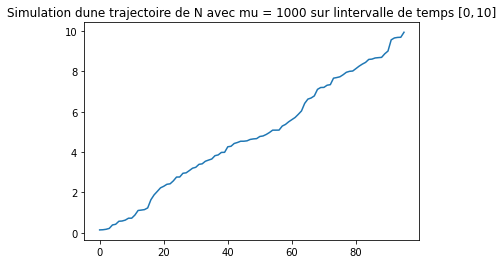

to =  5.494203235131844e-05
Estimation de tau = 0.6023379807566343


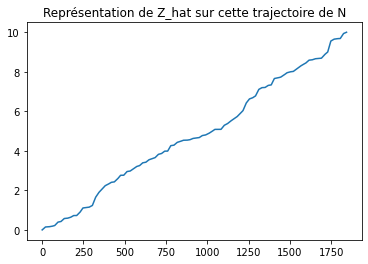

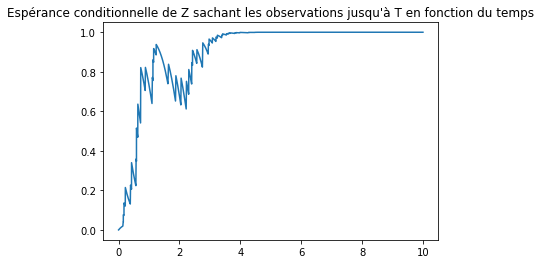

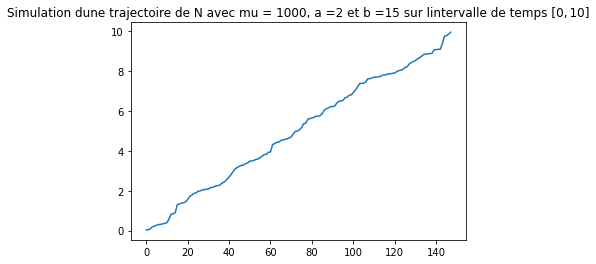

to =  0.004335662603739593
Estimation de tau = 0.32721245750836137


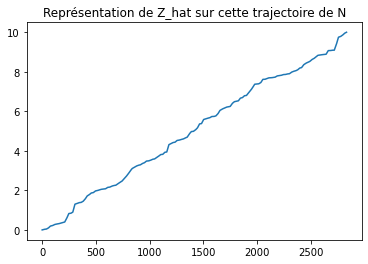

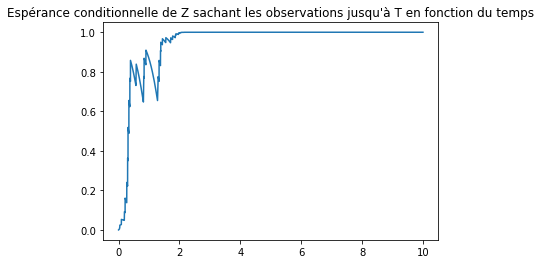

In [300]:
#avec mu = 1000 on a : 
sim_4 = Sim_N(T, a, b, 1000)
plt.plot(sim_4[1])
plt.title('Simulation dune trajectoire de N avec mu = 1000 sur lintervalle de temps [0, 10]')
plt.show()
plt.close()
print('to = ',sim_4[0])
Z_est_4 = Z_hat(a, b, 10, sim_4)
plt.plot(Z_est_4[1])
plt.title("Représentation de Z_hat sur cette trajectoire de N")
print("Estimation de tau =", Z_est_4[1][np.argmin(np.abs(Z_est_4[0] - 0.5*np.ones(len(Z_est_4[0]))))])
plt.show()
plt.close()
plt.plot(Z_est_4[1], Z_est_4[0])
plt.title("Espérance conditionnelle de Z sachant les observations jusqu'à T en fonction du temps")
plt.show()
plt.close()

sim_4_m = Sim_N(T, 2, 15, 1000)
plt.plot(sim_4_m[1])
plt.title('Simulation dune trajectoire de N avec mu = 1000, a =2 et b =15 sur lintervalle de temps [0, 10]')
plt.show()
plt.close()
print('to = ',sim_4_m[0])
Z_est_4_m = Z_hat(a, b, 10, sim_4_m)
plt.plot(Z_est_4_m[1])
plt.title("Représentation de Z_hat sur cette trajectoire de N")
print("Estimation de tau =", Z_est_4_m[1][np.argmin(np.abs(Z_est_4_m[0] - 0.5*np.ones(len(Z_est_4_m[0]))))])
plt.show()
plt.close()
plt.plot(Z_est_4_m[1], Z_est_4_m[0])
plt.title("Espérance conditionnelle de Z sachant les observations jusqu'à T en fonction du temps")
plt.show()
plt.close()

On trouve des résulats semblables et vraisemblables par rapport à ce à quoi on s'attendait en ordres de grandeurs malgrés une différence notable avec la réalité dû peut être à une trop grande variance.Cependant ajoutons que en faisant varier a et b on trouve des résulats très proches avec les deux méthodes. On remarque que plus a et b sont différents plus les méthodes gagnent en précision.